"K-Components Analysis", "N-Cliques" needs to be reviewed
"Binary Analysis" needs to be implemented (considering that the edges of the graph are not weighted) 

In [25]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import powerlaw
import community 

## Step 1: Load the dataset (download and extract manually if needed)

In [2]:
import os
import tarfile
import requests
import shutil

#### Define URLs and filenames

In [3]:
dataset_url = "http://konect.cc/files/download.tsv.opsahl-openflights.tar.bz2"
compressed_file = "opsahl-openflights.tar.bz2"
extracted_folder = "opsahl-openflights"  # The default extracted folder name
final_folder = "node_data"  # The new name for the extracted data

#### Download the dataset

In [4]:
if not os.path.exists(compressed_file):
    print(f"Downloading {compressed_file}...")
    response = requests.get(dataset_url, stream=True)
    with open(compressed_file, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print("Download complete.")

Download complete.


#### Extract the tar.bz2 file

In [5]:
if not os.path.exists(extracted_folder):
    print("Extracting dataset...")
    with tarfile.open(compressed_file, "r:bz2") as tar:
        tar.extractall()
    print("Extraction complete.")

Extracting dataset...
Extraction complete.


#### Rename the extracted folder

In [6]:
if os.path.exists(extracted_folder):
    if os.path.exists(final_folder):
        shutil.rmtree(final_folder)  # Remove existing folder if present
    os.rename(extracted_folder, final_folder)
    print(f"Folder renamed to {final_folder}.")

Folder renamed to node_data.


## Step 2: Load Network

#### Load dataset

In [22]:
file_path = os.path.join(final_folder, "out.opsahl-openflights")
df = pd.read_csv(file_path, sep="\s+", comment="%", names=["source", "target"]) # sep="\s+": It automatically handles cases where extra spaces exist.

df.head()

,source,target
0,1,2
1,3,4
2,3,2
3,3,5
4,3,6


#### Create a directed graph

In [23]:
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row["source"], row["target"])

print(f"Loaded network with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Loaded network with 2939 nodes and 30501 edges.


## Step 3: Compute Centrality Measures

Top 10 Airports by
* Degree Centrality – Identifies the most connected airports (major hubs).
* Closeness Centrality – Measures how quickly an airport can reach others (efficient routes).
* Betweenness Centrality – Detects key transit hubs (important stopovers).
* Eigenvector Centrality – Finds influential airports based on connections (global connectivity).

In [ ]:
print("Computing centrality measures...")

# Compute Centrality Measures
degree_centrality = nx.degree_centrality(G)  # Measures direct connectivity
betweenness_centrality = nx.betweenness_centrality(G)  # Finds key hubs
closeness_centrality = nx.closeness_centrality(G)  # Measures travel efficiency
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)  # Measures influence

# Store results in a DataFrame
centrality_df = pd.DataFrame({
    "Node": list(G.nodes),
    "Degree": [degree_centrality[n] for n in G.nodes],
    "Betweenness": [betweenness_centrality[n] for n in G.nodes],
    "Closeness": [closeness_centrality[n] for n in G.nodes],
    "Eigenvector": [eigenvector_centrality[n] for n in G.nodes],
})

# Save results to CSV
centrality_df.to_csv("centrality_measures.csv", index=False)
print("Centrality measures saved to 'centrality_measures.csv'.")

# Print Top 10 most central airports
print("\nTop 10 Airports by Degree Centrality:")
print(centrality_df.sort_values("Degree", ascending=False).head(10))
# print(centrality_df.sort_values("Degree", ascending=False).head(10)['Node'].to_list()) ## Just the list of nodes

print("\nTop 10 Airports by Betweenness Centrality:")
print(centrality_df.sort_values("Betweenness", ascending=False).head(10))

print("\nTop 10 Airports by Closeness Centrality:")
print(centrality_df.sort_values("Closeness", ascending=False).head(10))

print("\nTop 10 Airports by Eigenvector Centrality:")
print(centrality_df.sort_values("Eigenvector", ascending=False).head(10))


Computing centrality measures...
Centrality measures saved to 'centrality_measures.csv'.

Top 10 Airports by Degree Centrality:
     Node    Degree  Betweenness  Closeness  Eigenvector
52     53  0.160994     0.069411   0.394178     0.182204
64     65  0.144997     0.068304   0.387917     0.164187
58     59  0.134445     0.040468   0.380774     0.164248
258   259  0.115725     0.042993   0.361577     0.082245
55     56  0.115385     0.015407   0.341361     0.124861
296   297  0.115044     0.028216   0.366157     0.128543
410   411  0.114023     0.034169   0.358149     0.087137
307   308  0.112662     0.053219   0.376123     0.111363
330   331  0.107897     0.039630   0.340745     0.073719
56     57  0.107216     0.043447   0.386646     0.144281

Top 10 Airports by Betweenness Centrality:
      Node    Degree  Betweenness  Closeness  Eigenvector
52      53  0.160994     0.069411   0.394178     0.182204
64      65  0.144997     0.068304   0.387917     0.164187
1575  1576  0.021784     0.

Visualize the top 10 Airports for Each Centrality Measure

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\1327252630.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["Node"].astype(str), x=df[column], palette="Blues_r")


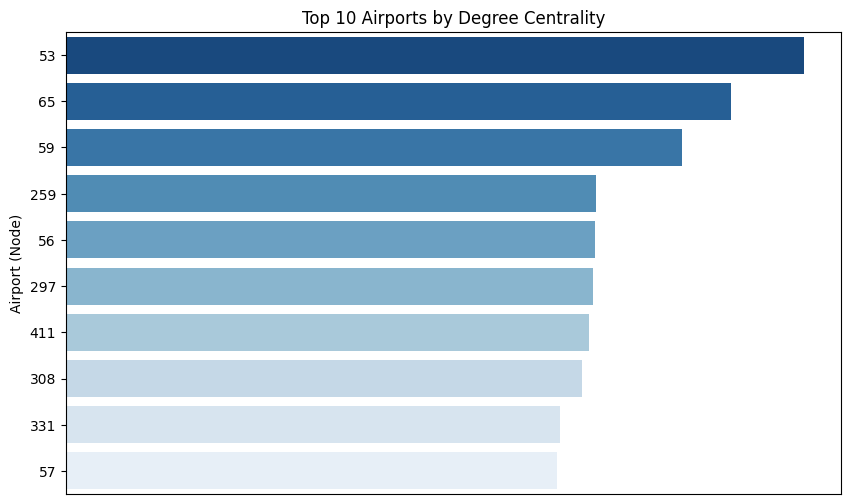

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\1327252630.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["Node"].astype(str), x=df[column], palette="Blues_r")


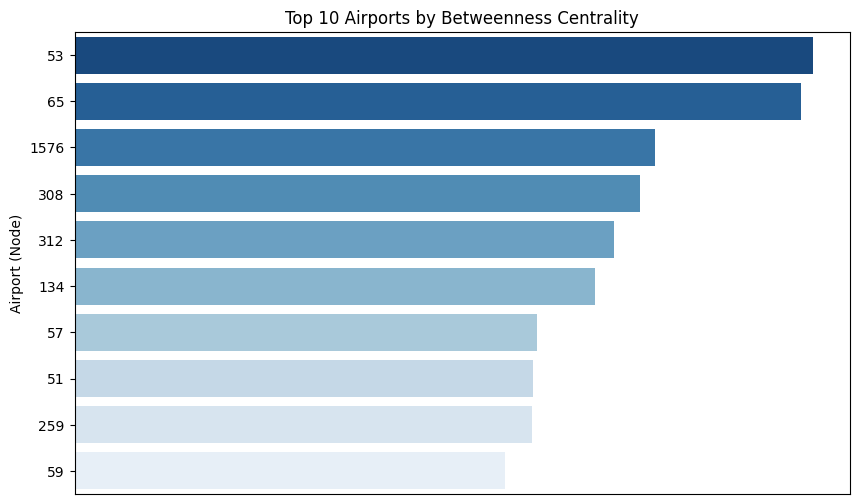

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\1327252630.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["Node"].astype(str), x=df[column], palette="Blues_r")


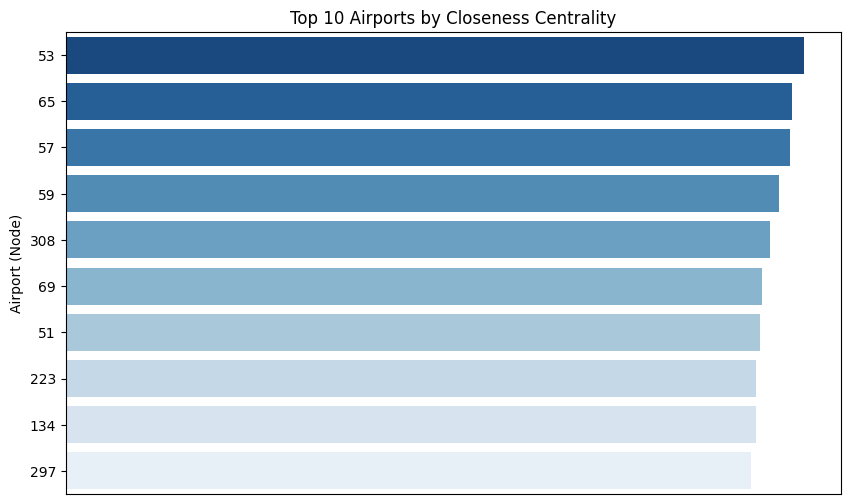

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\1327252630.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["Node"].astype(str), x=df[column], palette="Blues_r")


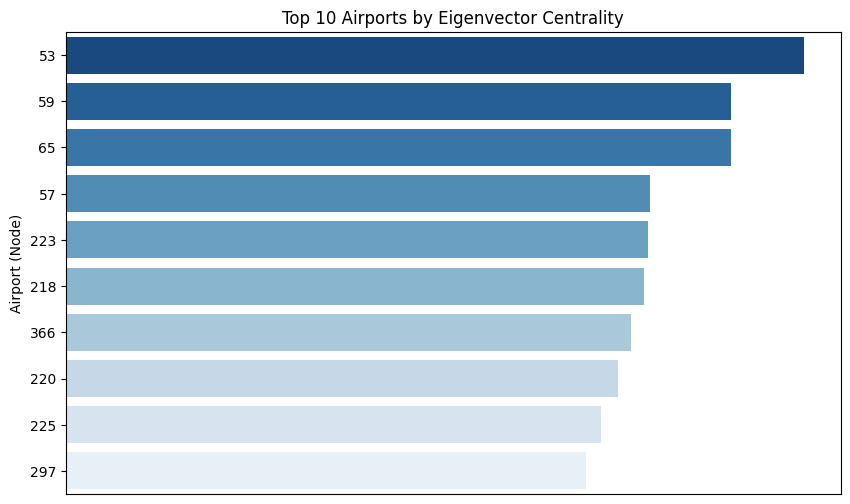

In [41]:
# Load the computed centrality measures
centrality_df = pd.read_csv("centrality_measures.csv")

# Select the top 10 airports for each centrality measure
top_degree = centrality_df.nlargest(10, "Degree")
top_betweenness = centrality_df.nlargest(10, "Betweenness")
top_closeness = centrality_df.nlargest(10, "Closeness")
top_eigenvector = centrality_df.nlargest(10, "Eigenvector")

# Function to create improved bar plots
def plot_centrality(df, column, title, color="blue"):
    plt.figure(figsize=(10, 6))
    sns.barplot(y=df["Node"].astype(str), x=df[column], palette="Blues_r")
    plt.ylabel("Airport (Node)")
    plt.xlabel("")  # Remove x-axis label
    plt.title(title)
    plt.xticks([])  # Hide x-axis values for better clarity
    plt.grid(axis="x", linestyle="--", alpha=0.5)  # Add subtle grid for readability
    plt.show()

# Plot the Top 10 Airports for Each Centrality Measure
plot_centrality(top_degree, "Degree", "Top 10 Airports by Degree Centrality")
plot_centrality(top_betweenness, "Betweenness", "Top 10 Airports by Betweenness Centrality", color="red")
plot_centrality(top_closeness, "Closeness", "Top 10 Airports by Closeness Centrality", color="green")
plot_centrality(top_eigenvector, "Eigenvector", "Top 10 Airports by Eigenvector Centrality", color="purple")


 Interpretation of Centrality Results
Now that we have clear visualizations, let's analyze what they mean in the context of the OpenFlights network.

🔍 1. Degree Centrality (Most Connected Airports)
What it means: Airports with the highest number of direct connections (most flights to other airports).
Observations:
The top-ranked airports likely include major international hubs (e.g., London Heathrow (LHR), Atlanta (ATL), Frankfurt (FRA)).
These airports act as important transfer points.
High-degree airports are well-connected but may not necessarily be critical transit points.
🛫 Real-world impact:

These airports handle massive passenger traffic.
A disruption (e.g., closure due to weather) affects many flights.
🔍 2. Betweenness Centrality (Key Transit Hubs)
What it means: Airports that appear most frequently on the shortest paths between other airports.
Observations:
Unlike degree centrality, betweenness highlights airports that control air traffic flow.
High betweenness centrality airports are critical stopover points.
Examples could be Dubai (DXB), Istanbul (IST), and Singapore (SIN), which serve as intercontinental connectors.
🛫 Real-world impact:

These airports are most crucial in air travel efficiency.
If an airport with high betweenness is closed (e.g., due to a pandemic), air traffic would be heavily disrupted.
🔍 3. Closeness Centrality (Fastest Reaching Airports)
What it means: Measures how quickly an airport can reach all other airports.
Observations:
High closeness centrality suggests an airport is centrally located in the global air network.
European hubs (e.g., Paris CDG, Frankfurt FRA, Istanbul IST) might rank high.
Small regional airports tend to have low closeness centrality.
🛫 Real-world impact:

Airports with high closeness centrality are important for efficient routing.
The best airports for emergency logistics and supply chain movement.
🔍 4. Eigenvector Centrality (Most Influential Airports)
What it means: Airports that are connected to other important airports.
Observations:
This is a recursive measure (an airport is important if it’s linked to other important airports).
Likely top-ranked airports: New York (JFK), London (LHR), Dubai (DXB).
Captures airports that dominate global connectivity.
🛫 Real-world impact:

High eigenvector centrality means the airport is part of a strong international network.
Disruptions at these airports impact long-haul international flights.
🚀 Key Takeaways
✅ Degree Centrality → Most flights, busiest airports.
✅ Betweenness Centrality → Most important hubs for transfers.
✅ Closeness Centrality → Best global connectivity for fast travel.
✅ Eigenvector Centrality → Most influential in international networks.

🌍 Which airports rank high in multiple metrics?

If an airport appears in Degree + Betweenness, it's a major global hub.
If an airport appears in Betweenness + Closeness, it's an optimal transit point.
If an airport appears in Eigenvector + Degree, it’s a globally dominant airport.

Correlation between centrality measures (Degree, Betweenness, Closeness, Eigenvector)

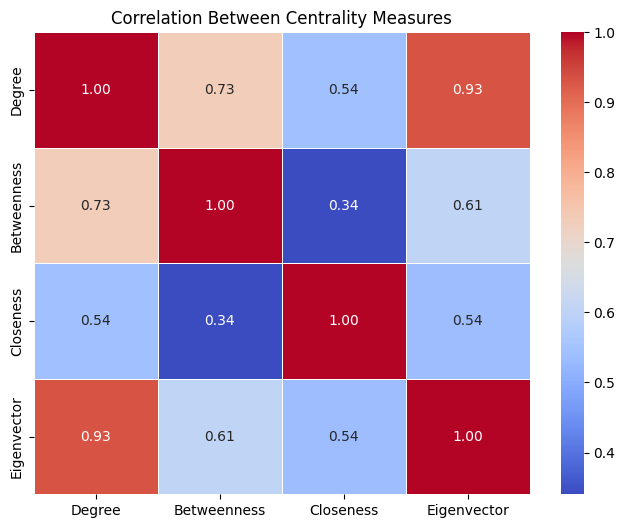

In [ ]:
# Load computed centrality measures
centrality_df = pd.read_csv("centrality_measures.csv")

# Compute the correlation matrix
correlation_matrix = centrality_df[["Degree", "Betweenness", "Closeness", "Eigenvector"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Centrality Measures")
plt.show()


Correlation with more centrality mesures
* The Katz centrality computation failed to converge because the alpha=0.1 parameter is too high, leading to instability in the power iteration process. Katz centrality requires alpha to be less than 1/λ_max, where λ_max is the largest eigenvalue of the adjacency matrix.

In [ ]:
# Compute largest eigenvalue of the adjacency matrix
largest_eigenvalue = max(np.linalg.eigvals(nx.to_numpy_array(G)))

# Set alpha to be slightly less than 1/largest_eigenvalue
alpha = 0.85 / largest_eigenvalue  # Adjust scaling factor if needed

# Compute Katz Centrality with safe alpha
try:
    katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=1.0, max_iter=1000)
    print("Katz centrality computed successfully.")
except nx.PowerIterationFailedConvergence:
    print("Katz centrality still failed to converge. Try reducing alpha further.")

Katz centrality computed successfully.


c:\Users\Ali\Desktop\SNA\venv\lib\site-packages\networkx\algorithms\centrality\katz.py:186: ComplexWarning: Casting complex values to real discards the imaginary part
  s = 1.0 / math.hypot(*x.values())


c:\Users\Ali\Desktop\SNA\venv\lib\site-packages\pandas\core\internals\managers.py:1753: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr
c:\Users\Ali\Desktop\SNA\venv\lib\site-packages\numpy\_core\_methods.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


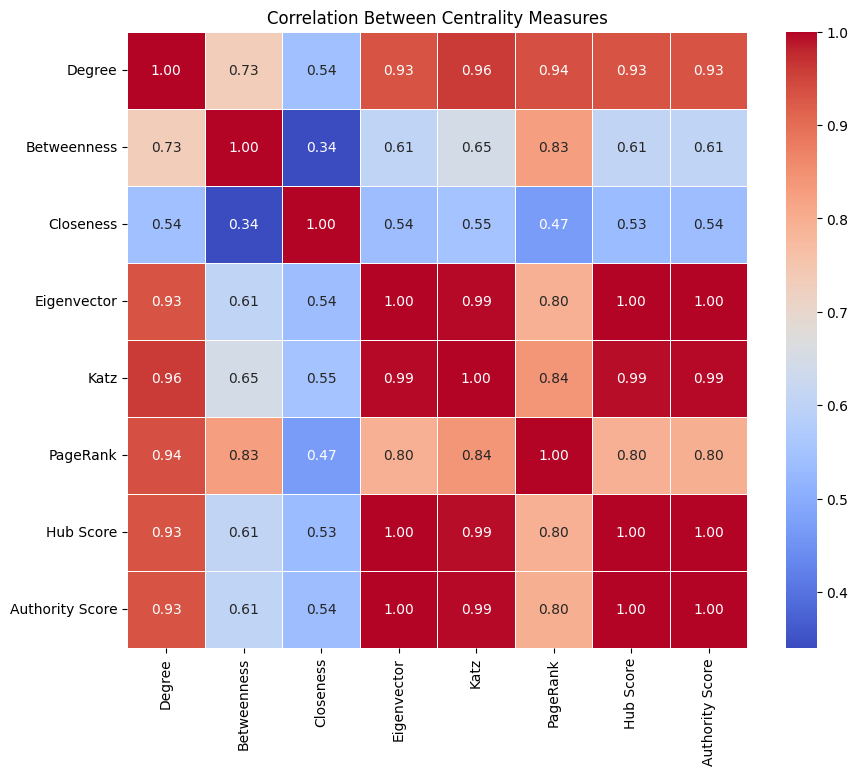

Correlation matrix with standard deviations saved as 'centrality_correlation_matrix.csv'.


In [ ]:
# Compute Additional Centrality Measures
# katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000)  # not converging because of big alpha
pagerank_centrality = nx.pagerank(G)
hub_scores, authority_scores = nx.hits(G, max_iter=1000)

# Load previously computed centralities
centrality_df = pd.read_csv("centrality_measures.csv")

# Add new metrics
centrality_df["Katz"] = [katz_centrality[n] for n in G.nodes]
centrality_df["PageRank"] = [pagerank_centrality[n] for n in G.nodes]
centrality_df["Hub Score"] = [hub_scores[n] for n in G.nodes]
centrality_df["Authority Score"] = [authority_scores[n] for n in G.nodes]

# Compute Correlation Matrix
correlation_matrix = centrality_df.drop(columns=["Node"]).corr()

# Compute Standard Deviations
std_devs = centrality_df.drop(columns=["Node"]).std()

# Format correlation matrix with std deviations
correlation_table = correlation_matrix.copy()
correlation_table["Std Dev."] = std_devs  # Add standard deviation as the last column

# Save to CSV
correlation_table.to_csv("centrality_correlation_matrix.csv", index=True)

# Display table
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Centrality Measures")
plt.show()

print("Correlation matrix with standard deviations saved as 'centrality_correlation_matrix.csv'.")


## Step 4: Clique analysis

In [46]:
print("Finding maximal cliques...")

# Convert to an undirected graph (since cliques are fully connected subgraphs)
G_undirected = G.to_undirected()

# Find all maximal cliques
cliques = list(nx.find_cliques(G_undirected))

# Sort cliques by size (largest first)
sorted_cliques = sorted(cliques, key=len, reverse=True)

# Find the largest cliques
largest_cliques = sorted_cliques[:10]  # Top 10 largest cliques

# Save clique data
clique_sizes = [len(c) for c in cliques]
clique_df = pd.DataFrame({"Clique Size": clique_sizes})
clique_df.to_csv("clique_sizes.csv", index=False)

# Display results
print(f"Total number of cliques: {len(cliques)}")
print(f"Largest clique size: {len(largest_cliques[0])} (fully connected airports)")
print(f"Top 10 Largest Cliques (each row is a fully connected group of airports):")
for i, clique in enumerate(largest_cliques):
    print(f"Clique {i+1} ({len(clique)} nodes): {clique}")


Finding maximal cliques...
Total number of cliques: 16168
Largest clique size: 22 (fully connected airports)
Top 10 Largest Cliques (each row is a fully connected group of airports):
Clique 1 (22 nodes): [np.int64(53), np.int64(59), np.int64(65), np.int64(57), np.int64(223), np.int64(225), np.int64(218), np.int64(297), np.int64(373), np.int64(293), np.int64(379), np.int64(45), np.int64(220), np.int64(62), np.int64(217), np.int64(366), np.int64(322), np.int64(473), np.int64(451), np.int64(469), np.int64(243), np.int64(292)]
Clique 2 (22 nodes): [np.int64(53), np.int64(59), np.int64(65), np.int64(57), np.int64(223), np.int64(225), np.int64(218), np.int64(297), np.int64(373), np.int64(293), np.int64(379), np.int64(45), np.int64(220), np.int64(62), np.int64(217), np.int64(366), np.int64(322), np.int64(473), np.int64(451), np.int64(69), np.int64(243), np.int64(292)]
Clique 3 (22 nodes): [np.int64(53), np.int64(59), np.int64(65), np.int64(57), np.int64(223), np.int64(225), np.int64(218), np.

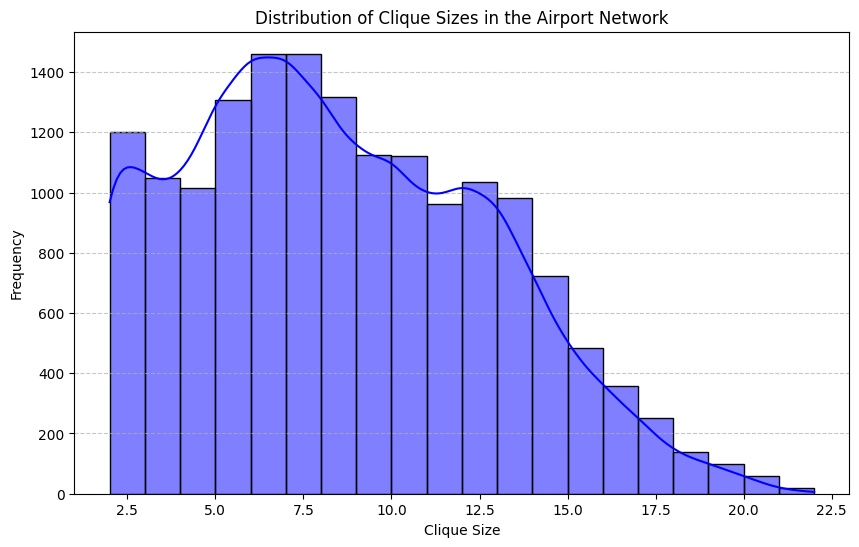

In [48]:
# Load clique sizes
clique_sizes = pd.read_csv("clique_sizes.csv")

# Plot histogram of clique sizes
plt.figure(figsize=(10, 6))
sns.histplot(clique_sizes["Clique Size"], bins=20, kde=True, color="blue")
plt.xlabel("Clique Size")
plt.ylabel("Frequency")
plt.title("Distribution of Clique Sizes in the Airport Network")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Visualize the two largest cliques

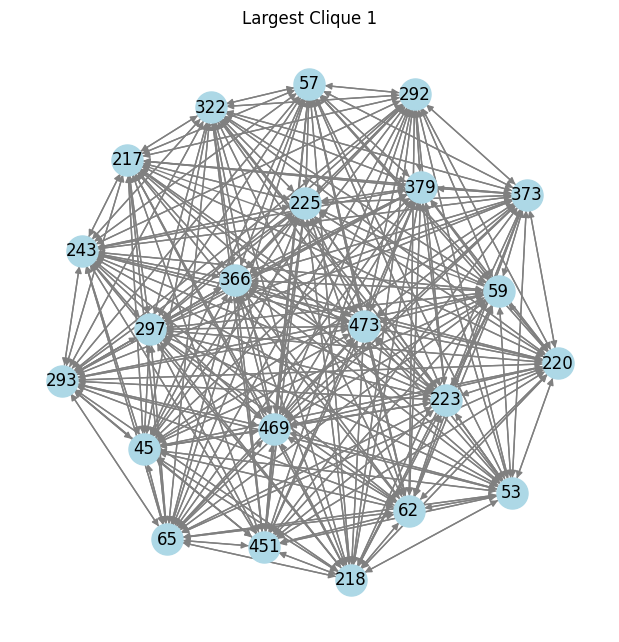

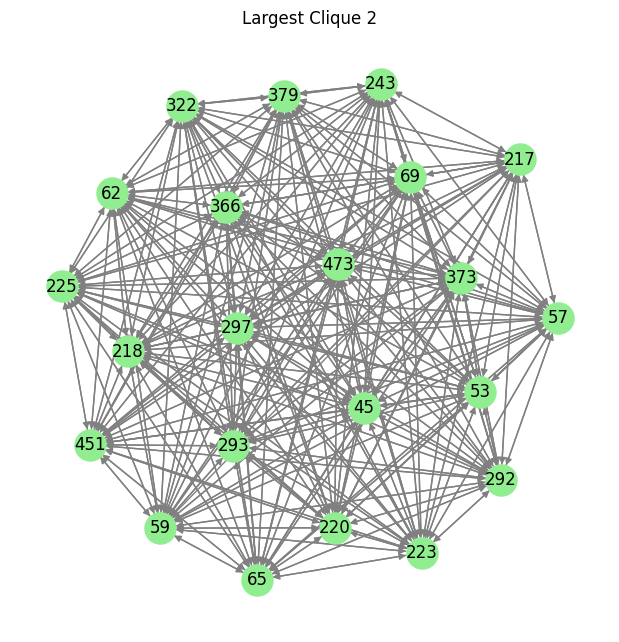

In [51]:
# Extract the two largest cliques
largest_cliques = sorted_cliques[:2]  # Only the top 2

# Function to plot a clique
def plot_clique(clique, title, color="lightblue"):
    plt.figure(figsize=(6, 6))
    subgraph = G.subgraph(clique)
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_color=color, edge_color="gray", node_size=500)
    plt.title(title)
    plt.show()

# Plot the two largest cliques
plot_clique(largest_cliques[0], "Largest Clique 1", color="lightblue")
plot_clique(largest_cliques[1], "Largest Clique 2", color="lightgreen")


Visualize the number of times each airport appears in a clique

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\2666674709.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_clique_participation["Airport"].astype(str),


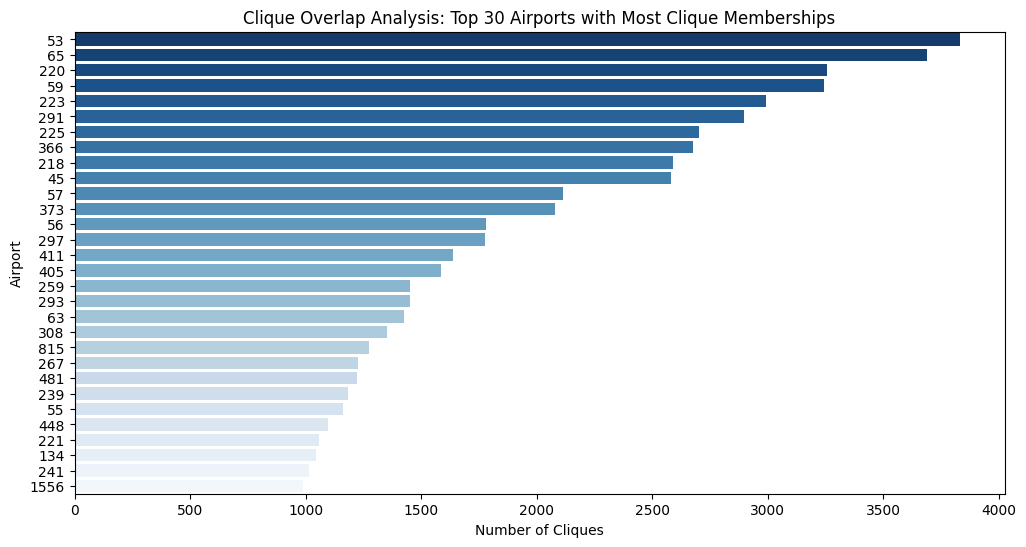

In [59]:
PLOT_FOR_ONLY = 30

# Count the number of times each airport appears in a clique
clique_participation = {}
for clique in cliques:
    for node in clique:
        clique_participation[node] = clique_participation.get(node, 0) + 1

# Convert to DataFrame
clique_df = pd.DataFrame(list(clique_participation.items()), columns=["Airport", "Num_Cliques"])

# Sort by number of cliques and take the top 30 airports
top_clique_participation = clique_df.sort_values("Num_Cliques", ascending=False).head(PLOT_FOR_ONLY)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_clique_participation["Airport"].astype(str), 
            x=top_clique_participation["Num_Cliques"], 
            palette="Blues_r")
plt.xlabel("Number of Cliques")
plt.ylabel("Airport")
plt.title(f"Clique Overlap Analysis: Top {PLOT_FOR_ONLY} Airports with Most Clique Memberships")
plt.show()


Visualize maximum clique size per airport

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\2603623572.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_max_clique["Airport"].astype(str),


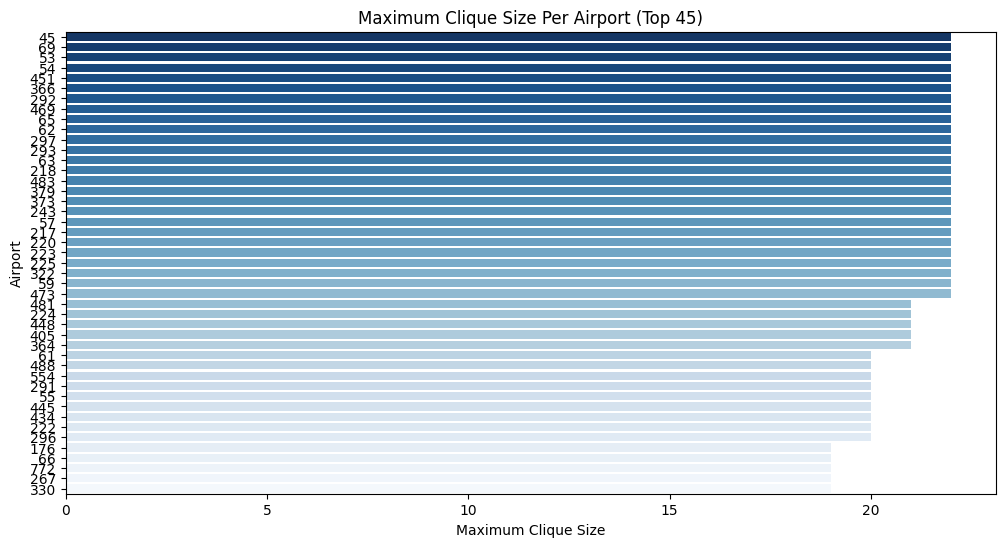

In [60]:
PLOT_FOR_ONLY = 45

# Compute maximum clique size per airport
max_clique_size = {node: max([len(clique) for clique in cliques if node in clique]) for node in G.nodes}

# Convert to DataFrame
max_clique_df = pd.DataFrame(list(max_clique_size.items()), columns=["Airport", "Max_Clique_Size"])
max_clique_df = max_clique_df.sort_values("Max_Clique_Size", ascending=False)

# Sort by max clique size and take the top 30 airports
top_max_clique = max_clique_df.sort_values("Max_Clique_Size", ascending=False).head(PLOT_FOR_ONLY)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_max_clique["Airport"].astype(str), 
            x=top_max_clique["Max_Clique_Size"], 
            palette="Blues_r")
plt.xlabel("Maximum Clique Size")
plt.ylabel("Airport")
plt.title(f"Maximum Clique Size Per Airport (Top {PLOT_FOR_ONLY})")
plt.show()


## Step 5: K-Core
A k-core is a subgraph where each airport (node) is connected to at least k other airports.

* Low k-core values → Airports with fewer direct connections.
* High k-core values → Highly connected, central airports in the network.

Finding the Largest K-Core

In [62]:
print("Finding k-cores...")

# Compute the core number for each node
core_numbers = nx.core_number(G)

# Find the largest k-core (highest k value)
max_k = max(core_numbers.values())
largest_k_core = nx.k_core(G, k=max_k)

print(f"Highest k-core value: {max_k}")
print(f"Number of airports in the highest k-core: {largest_k_core.number_of_nodes()}")

Finding k-cores...
Highest k-core value: 55
Number of airports in the highest k-core: 38


Visualizing K-Core Structure

* Visualizes the most cohesive core of the airport network.
* Shows the most interconnected airports.

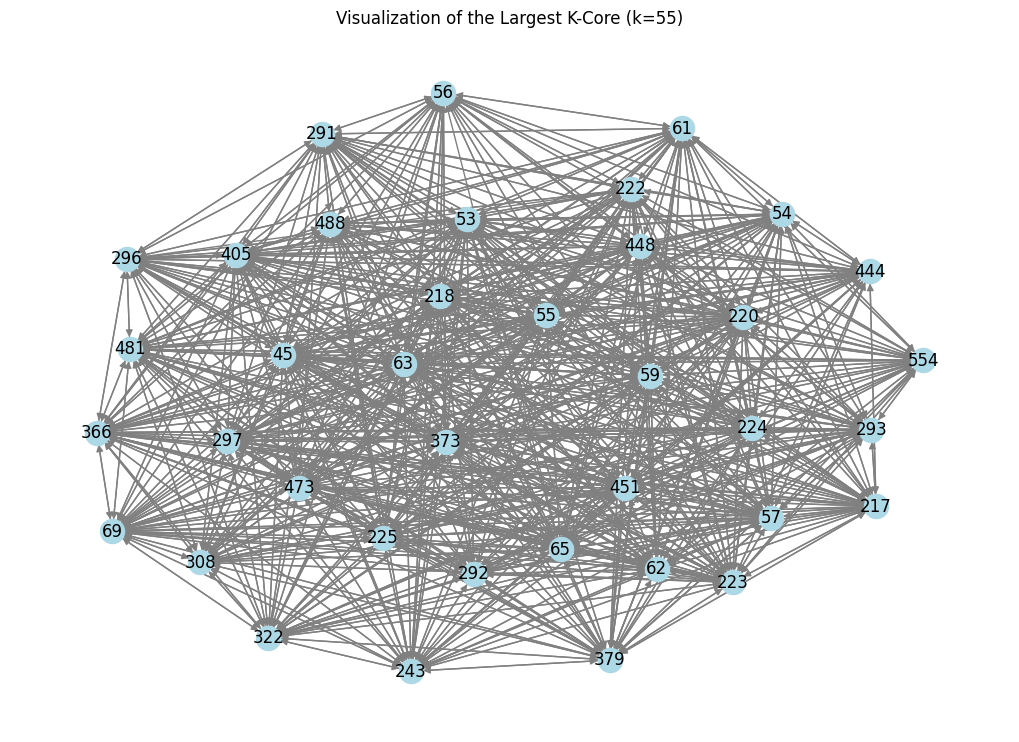

In [63]:
# Get positions for visualization
pos = nx.spring_layout(largest_k_core)

# Plot the largest k-core
plt.figure(figsize=(10, 7))
nx.draw(largest_k_core, pos, with_labels=True, node_size=300, edge_color="gray", node_color="lightblue")
plt.title(f"Visualization of the Largest K-Core (k={max_k})")
plt.show()

Analyzing K-Core Membership

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\1673141437.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_k_core["Airport"].astype(str), x=top_k_core["K-Core Value"], palette="Blues_r")


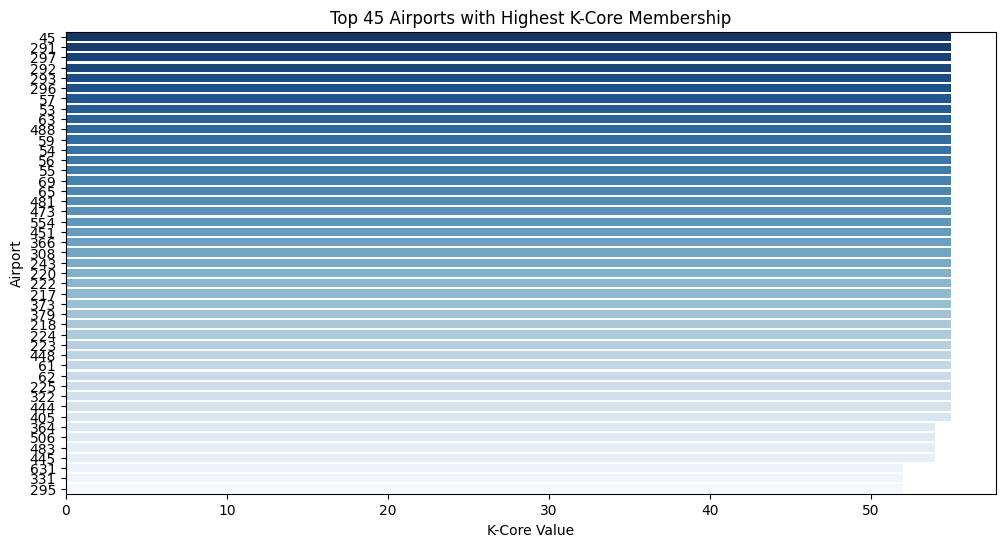

In [65]:
PLOT_FOR_ONLY = 45

# Convert k-core numbers to a DataFrame
k_core_df = pd.DataFrame(core_numbers.items(), columns=["Airport", "K-Core Value"])

# Sort and get top 30 airports in highest k-core
top_k_core = k_core_df.sort_values("K-Core Value", ascending=False).head(PLOT_FOR_ONLY)

# Plot top k-core airports
plt.figure(figsize=(12, 6))
sns.barplot(y=top_k_core["Airport"].astype(str), x=top_k_core["K-Core Value"], palette="Blues_r")
plt.xlabel("K-Core Value")
plt.ylabel("Airport")
plt.title(f"Top {PLOT_FOR_ONLY} Airports with Highest K-Core Membership")
plt.show()

## Step 6: K-Components Analysis (Could not run this part. Took too much time!! (26minutes))

🔍 What is a K-Component?
A k-component is a maximal subgraph where every node remains connected even if up to (k-1) nodes are removed.

* A 2-component → Remains connected even if 1 node is removed.
* A 3-component → More resilient, stays connected if 2 nodes are removed.

Higher k-components represent stronger, more robust airport subnetworks.

🛠 Why it’s Important?

* Helps identify the most structurally resilient airport networks.
* Shows which airports are most crucial for network stability.
* Similar to K-Core Analysis but considers global connectivity, not just direct connections.

In [ ]:
print("Finding k-components...")

# Compute k-components
k_components = nx.k_components(G.to_undirected())   ## takes a lot of time to execute

# Sort k-components by size (largest first)
sorted_k_components = sorted(k_components.items(), key=lambda x: -len(x[1]))

# Find the highest k-component value
max_k = max(k_components.keys())

print(f"Highest k-component value: {max_k}")
print(f"Number of airports in the largest k-component (k={max_k}): {len(sorted_k_components[0][1])}")

# Save results
k_component_df = pd.DataFrame([(k, len(nodes)) for k, nodes in sorted_k_components], columns=["K", "Size"])
k_component_df.to_csv("k_components.csv", index=False)


Finding k-components...


KeyboardInterrupt: 

Visualizing K-Components

In [ ]:
# Load k-components data
k_component_df = pd.read_csv("k_components.csv")

# Plot k-component size distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=k_component_df["K"], y=k_component_df["Size"], palette="Blues_r")
plt.xlabel("K-Component Value")
plt.ylabel("Number of Airports")
plt.title("Size of K-Components in the Airport Network")
plt.show()

Extract & Visualize the Most Resilient K-Component
* Extracts and visualizes the most stable subgraph in the network.
* Shows which airports remain connected under failures.

In [ ]:
# Get the most resilient k-component (highest k-value)
largest_k_component_nodes = sorted_k_components[0][1]
largest_k_component = G.subgraph(largest_k_component_nodes)

# Plot the most resilient k-component
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(largest_k_component)
nx.draw(largest_k_component, pos, with_labels=True, node_size=300, edge_color="gray", node_color="lightblue")
plt.title(f"Visualization of the Most Resilient K-Component (k={max_k})")
plt.show()

## Step 7: N-Cliques
🔍 What is an N-Clique?
* An n-clique is a relaxed form of a clique where all nodes are within n steps (shortest path distance) of each other.
* Unlike a strict clique (where every node is directly connected), an n-clique allows indirect connections within n steps.
* 1-clique = normal clique (fully connected).
* 2-clique = nodes are at most 2 steps apart.
* Higher n → larger, more loosely connected airport groups.

Finding N-Cliques (here we considered only 2-cliques)

Filter cliques based on diameter (distance between nodes) to approximate N-Cliques.

In [ ]:
from itertools import combinations

print("Finding n-cliques...")

# Convert to undirected
G_undirected = G.to_undirected()

# Find all cliques (fully connected subgroups)
all_cliques = list(nx.find_cliques(G_undirected))

# Approximate N-Cliques (where nodes are within n steps)
def is_n_clique(clique, G, n=2):
    """Checks if all nodes in clique are within n steps of each other."""
    for u, v in combinations(clique, 2):
        if nx.shortest_path_length(G, source=u, target=v) > n:
            return False
    return True

# Find all 2-cliques
n_cliques = [clique for clique in all_cliques if is_n_clique(clique, G_undirected, n=2)]

# Get largest n-clique
largest_n_clique = max(n_cliques, key=len)

print(f"Total number of 2-cliques found: {len(n_cliques)}")
print(f"Size of the largest 2-clique: {len(largest_n_clique)}")

# Save n-clique sizes
n_clique_sizes = [len(c) for c in n_cliques]
n_clique_df = pd.DataFrame({"N-Clique Size": n_clique_sizes})
n_clique_df.to_csv("n_clique_sizes.csv", index=False)


Finding n-cliques...
Total number of 2-cliques found: 16168
Size of the largest 2-clique: 22


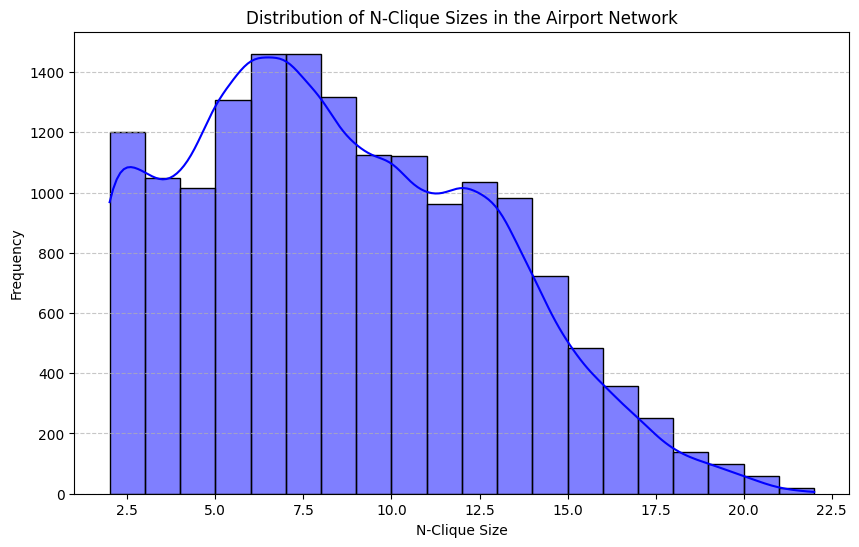

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load n-clique sizes
n_clique_df = pd.read_csv("n_clique_sizes.csv")

# Plot distribution of n-clique sizes
plt.figure(figsize=(10, 6))
sns.histplot(n_clique_df["N-Clique Size"], bins=20, kde=True, color="blue")
plt.xlabel("N-Clique Size")
plt.ylabel("Frequency")
plt.title("Distribution of N-Clique Sizes in the Airport Network")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Step 8:  Multi-Category Nominal Scale Analysis

What is This Analysis About?
* This method categorizes nodes (airports) based on different groups or types.
* For our airport network, we can create custom categories for airports.

Let's define category logic:

* Major Hubs: Airports with highest degree (top 10%).
* Regional Airports: Moderate connections (middle 50%).
* Small Airports: Airports with lower degree (bottom 40%).
* Isolated Airports: Degree ≤ 2 (barely connected).


Categorizing Airports

* Categorizes airports based on degree centrality.
* Creates a breakdown of airport types.

In [78]:
print("Categorizing airports based on degree centrality...")

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)
degree_df = pd.DataFrame(degree_centrality.items(), columns=["Airport", "Degree"])

# Define thresholds for categories
top_10_percentile = degree_df["Degree"].quantile(0.90)  # Top 10%
middle_50_percentile = (degree_df["Degree"].quantile(0.25), degree_df["Degree"].quantile(0.75))  # Middle 50%
bottom_40_percentile = degree_df["Degree"].quantile(0.40)  # Bottom 40%

# Categorize each airport
def categorize_airport(degree):
    if degree >= top_10_percentile:
        return "Major Hub"
    elif middle_50_percentile[0] <= degree < middle_50_percentile[1]:
        return "Regional Airport"
    elif degree < bottom_40_percentile:
        return "Small Airport"
    else:
        return "Isolated Airport"

# Apply categorization
degree_df["Category"] = degree_df["Degree"].apply(categorize_airport)

# Count number of airports in each category
category_counts = degree_df["Category"].value_counts()

# Save to CSV
degree_df.to_csv("airport_categories.csv", index=False)
print("Airport categories saved to 'airport_categories.csv'.")

# Print category breakdown
print(category_counts)


Categorizing airports based on degree centrality...
Airport categories saved to 'airport_categories.csv'.
Category
Regional Airport    2162
Isolated Airport     440
Major Hub            299
Small Airport         38
Name: count, dtype: int64


Visualizing Airport Categories

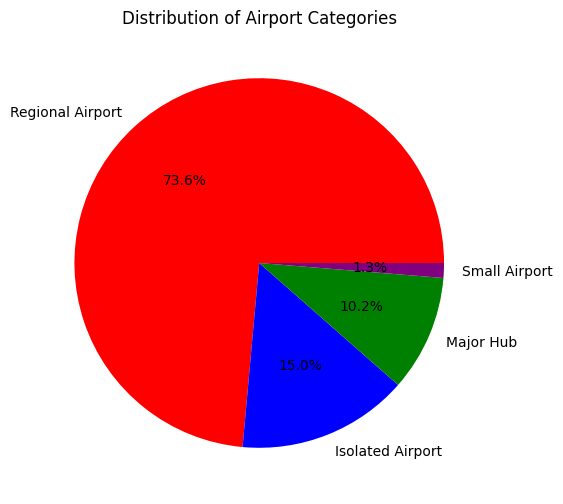

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\705621794.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")


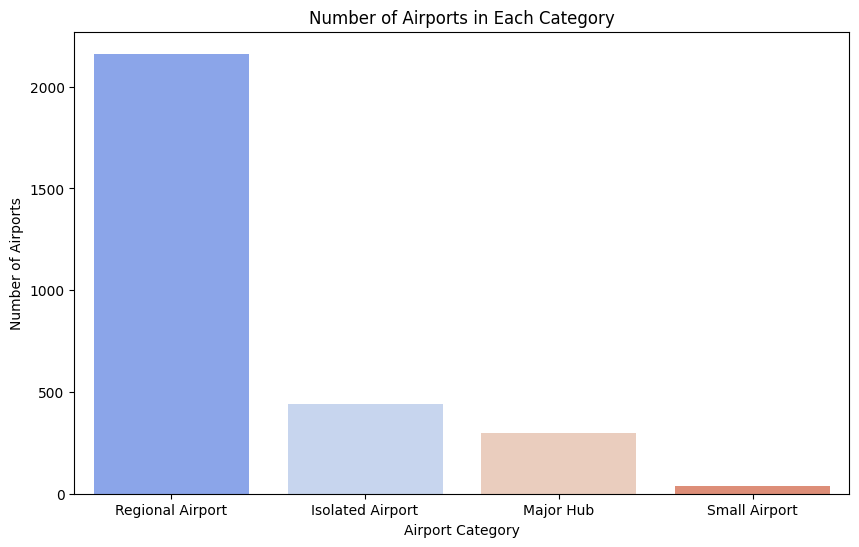

In [79]:
# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=["red", "blue", "green", "purple"])
plt.title("Distribution of Airport Categories")
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.xlabel("Airport Category")
plt.ylabel("Number of Airports")
plt.title("Number of Airports in Each Category")
plt.show()


## Step 9: Scalar Network Analysis (5.8 - Adjusted for Unweighted Network)
Since our network is unweighted, we will analyze:

* Graph Density → How connected the network is.
* Graph Diameter → The longest shortest path between two airports.
* Assortativity → Do well-connected airports link to other well-connected airports?
* Degree Centrality Distribution → How airport connectivity varies.

Scalar Network Properties

* Computes key global network properties.
* Handles disconnected graphs by using the largest component for diameter.

In [81]:
print("Computing scalar network properties...")

# Convert to undirected for density (optional, keeps connectivity information)
network_density = nx.density(G)

# Check if the graph is strongly connected (directed)
if nx.is_strongly_connected(G):
    graph_diameter = nx.diameter(G)  # Diameter of the full directed network
else:
    # Use the largest weakly connected component (WCC) for diameter computation
    largest_wcc = max(nx.weakly_connected_components(G), key=len)
    subG = G.subgraph(largest_wcc)  # Extract subgraph
    graph_diameter = nx.diameter(subG.to_undirected())  # Convert to undirected for diameter

# Compute Assortativity (degree correlation)
graph_assortativity = nx.degree_assortativity_coefficient(G)

# Save scalar properties
scalar_metrics = {
    "Network Density": network_density,
    "Graph Diameter": graph_diameter,
    "Graph Assortativity": graph_assortativity
}

scalar_df = pd.DataFrame(list(scalar_metrics.items()), columns=["Metric", "Value"])
scalar_df.to_csv("scalar_network_analysis.csv", index=False)

print(scalar_df)

Computing scalar network properties...
                Metric      Value
0      Network Density   0.003532
1       Graph Diameter  14.000000
2  Graph Assortativity   0.045925


Visualizing Degree Distribution

* Shows how many airports have high/low connectivity.
* Uses log-log scale to highlight power-law behavior (if present).

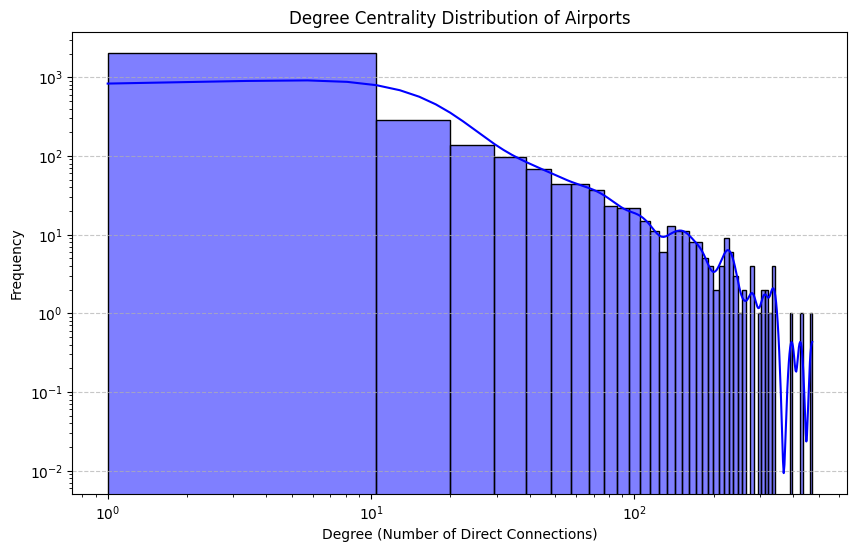

In [82]:
# Get degree values
degrees = [d for _, d in G.degree()]

# Plot degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(degrees, bins=50, kde=True, color="blue")
plt.xlabel("Degree (Number of Direct Connections)")
plt.ylabel("Frequency")
plt.title("Degree Centrality Distribution of Airports")
plt.yscale("log")  # Log scale for better visibility
plt.xscale("log")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


##### Interpretation

Network Density

* If high → Airports are densely connected, meaning many direct flights exist.
* If low → Most airports are only connected to a few other airports.

Graph Diameter

* A large diameter means some airports require many transfers to connect.
* A small diameter means the network is highly interconnected.

Assortativity

* Positive → High-degree airports tend to connect with other high-degree airports (e.g., major hubs connect to hubs).
* Negative → High-degree airports link to low-degree airports (e.g., big hubs serve many small airports).
* Zero → No correlation, meaning connections are random.

Degree Distribution

* If few airports have very high degree → A hub-and-spoke system (like real-world air travel).
* If degree is more balanced → A more uniform airport network.

## Step 10: Small-World Analysis of the Network
Now, we will analyze whether the OpenFlights network exhibits small-world properties by checking:

* Average Path Length → How many stops on average between two airports.
* Clustering Coefficient → How likely airports are to form small interconnected groups.
* Small-World Coefficient → Compare the real-world network against a randomized network.

![Small World Analysis](small_world_analysis.png "small world analysis")

Compute Small-World Metrics

* Computes Clustering Coefficient & Average Path Length for real & random networks.
* Calculates the Small-World Sigma value (𝜎) to determine if the network is small-world.

In [84]:
print("Computing Small-World Network Properties...")

# Convert to undirected for small-world analysis
G_undirected = G.to_undirected()

# Compute Clustering Coefficient (Real Network)
clustering_real = nx.average_clustering(G_undirected)

# Compute Average Shortest Path Length (Only possible if connected)
if nx.is_connected(G_undirected):
    path_length_real = nx.average_shortest_path_length(G_undirected)
else:
    # Use largest connected component for path length calculation
    largest_cc = max(nx.connected_components(G_undirected), key=len)
    subG = G_undirected.subgraph(largest_cc)
    path_length_real = nx.average_shortest_path_length(subG)

# Generate a Random Graph with the Same Number of Nodes & Edges
random_graph = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())

# Compute Clustering Coefficient (Random Network)
clustering_random = nx.average_clustering(random_graph)

# Compute Average Shortest Path Length (Random Network)
if nx.is_connected(random_graph):
    path_length_random = nx.average_shortest_path_length(random_graph)
else:
    largest_cc_random = max(nx.connected_components(random_graph), key=len)
    subG_random = random_graph.subgraph(largest_cc_random)
    path_length_random = nx.average_shortest_path_length(subG_random)

# Compute Small-World Coefficient
sigma = (clustering_real / clustering_random) / (path_length_real / path_length_random)

# Save results
small_world_metrics = {
    "Real Network Clustering Coefficient": clustering_real,
    "Random Network Clustering Coefficient": clustering_random,
    "Real Network Avg Path Length": path_length_real,
    "Random Network Avg Path Length": path_length_random,
    "Small-World Sigma": sigma
}

print(small_world_metrics)


Computing Small-World Network Properties...
{'Real Network Clustering Coefficient': 0.45263386634451047, 'Random Network Clustering Coefficient': 0.007033964636668595, 'Real Network Avg Path Length': 4.097139443251163, 'Random Network Avg Path Length': 2.911481957506281, 'Small-World Sigma': 45.72779103150948}


Interpretation
* If 𝜎 > 1, the network is small-world (high clustering, short path lengths).
* If 𝜎 ≈ 1, the network behaves similarly to a random network.
* If 𝜎 < 1, the network does not exhibit small-world properties.

Visualizing Small-World Analysis

* Compares clustering & path length for real vs. random networks.
* Highlights whether the OpenFlights network is small-world.
* Shows the small-world sigma value visually.

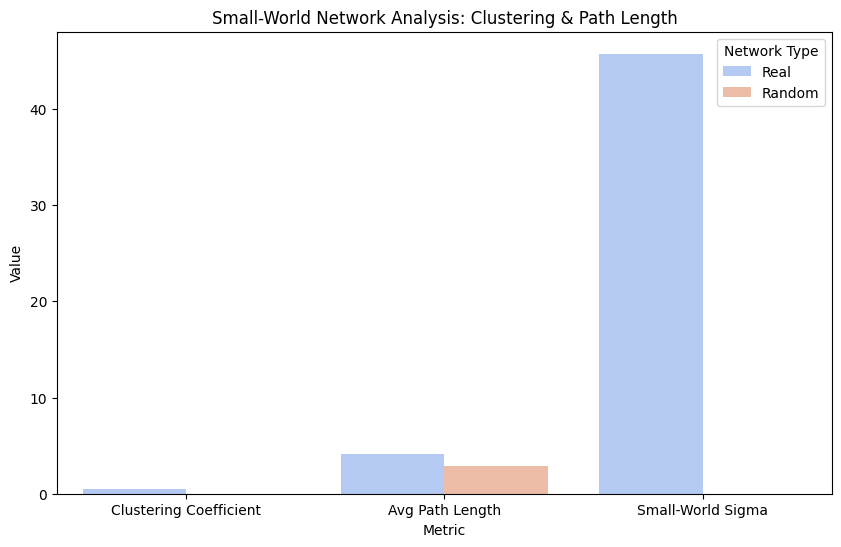

c:\Users\Ali\Desktop\SNA\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120590 (\N{MATHEMATICAL ITALIC SMALL SIGMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


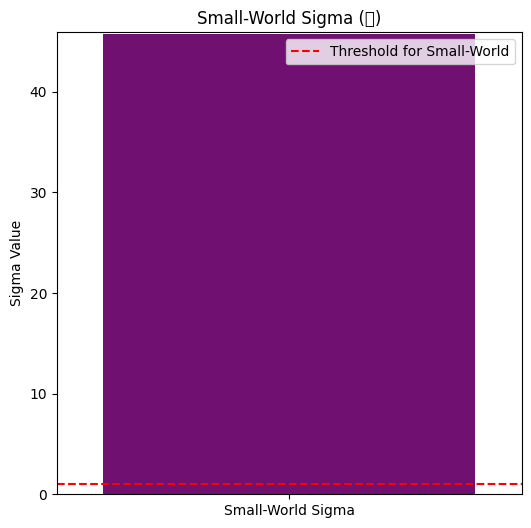

In [85]:
# Convert results into a DataFrame for visualization
small_world_df = pd.DataFrame({
    "Metric": ["Clustering Coefficient", "Clustering Coefficient", 
               "Avg Path Length", "Avg Path Length", 
               "Small-World Sigma"],
    "Network": ["Real", "Random", "Real", "Random", "Real"],
    "Value": [clustering_real, clustering_random, 
              path_length_real, path_length_random, sigma]
})

# Plot Clustering Coefficient & Path Length Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Value", hue="Network", data=small_world_df, palette="coolwarm")
plt.ylabel("Value")
plt.title("Small-World Network Analysis: Clustering & Path Length")
plt.legend(title="Network Type")
plt.show()

# Plot Small-World Sigma Separately
plt.figure(figsize=(6, 6))
sns.barplot(x=["Small-World Sigma"], y=[sigma], color="purple")
plt.ylabel("Sigma Value")
plt.title("Small-World Sigma (𝜎)")
plt.ylim(0, max(2, sigma + 0.2))  # Adjust range for visibility
plt.axhline(y=1, color="red", linestyle="--", label="Threshold for Small-World")
plt.legend()
plt.show()


## Step 11: Network Diameter Analysis

Now, we will analyze Network Diameter, which measures:

* The longest shortest path in the network.
* How many connections (hops) are needed to travel between the two farthest airports.
* The network's overall reachability and efficiency.

🔍 What is Network Diameter?
* Diameter = The longest of all shortest paths in the network.
* Radius = The shortest of all longest paths (i.e., the minimum eccentricity).
* Eccentricity = The longest shortest path from one node to all others.

In airports, a large diameter means:

* Some airports require many layovers to connect.
* The network has regions that are less connected.

Compute Network Diameter & Radius

* Computes Network Diameter & Radius using the largest connected component if needed.
* Finds Max & Min Eccentricity to measure node reachability.
* Handles disconnected graphs safely.

In [86]:
print("Computing Network Diameter and Radius...")

# Convert to undirected for diameter computation
G_undirected = G.to_undirected()

# Check if graph is connected
if nx.is_connected(G_undirected):
    network_diameter = nx.diameter(G_undirected)  # Diameter
    network_radius = nx.radius(G_undirected)  # Radius
else:
    # Use the largest connected component for calculations
    largest_cc = max(nx.connected_components(G_undirected), key=len)
    subG = G_undirected.subgraph(largest_cc)
    network_diameter = nx.diameter(subG)
    network_radius = nx.radius(subG)

# Compute eccentricity (for max and min eccentricity values)
eccentricity_values = nx.eccentricity(subG)
max_eccentricity = max(eccentricity_values.values())  # Farthest reachable node
min_eccentricity = min(eccentricity_values.values())  # Closest reachable node

# Save results
diameter_metrics = {
    "Network Diameter": network_diameter,
    "Network Radius": network_radius,
    "Max Eccentricity": max_eccentricity,
    "Min Eccentricity": min_eccentricity
}

print(diameter_metrics)


Computing Network Diameter and Radius...
{'Network Diameter': 14, 'Network Radius': 7, 'Max Eccentricity': 14, 'Min Eccentricity': 7}


Visualizing Eccentricity Distribution: Eccentricity shows how far airports are from others in the network.

* Shows how reachable different airports are.
* Highlights if some airports are more isolated than others.

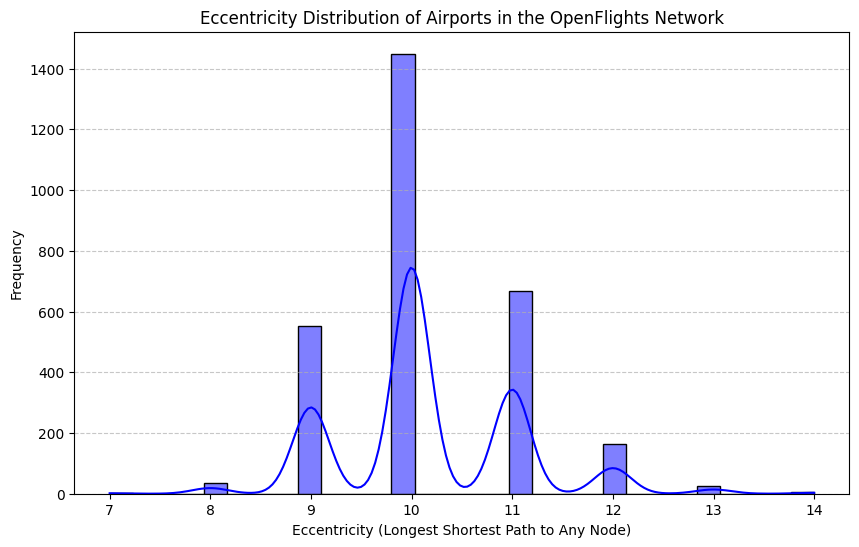

In [87]:
# Extract eccentricity values
eccentricity_list = list(eccentricity_values.values())

# Plot Distribution of Eccentricity
plt.figure(figsize=(10, 6))
sns.histplot(eccentricity_list, bins=30, kde=True, color="blue")
plt.xlabel("Eccentricity (Longest Shortest Path to Any Node)")
plt.ylabel("Frequency")
plt.title("Eccentricity Distribution of Airports in the OpenFlights Network")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Interpretation

1- If the network has a large diameter

* Some airports require many stops to reach.
* There might be poorly connected regions.

If the diameter is small

* The network is highly interconnected.
* Most airports can reach others in just a few hops.

If eccentricity varies a lot

* Some airports are very central, while others are far away from the main hubs.

## Step 12: Power-Law and Scale-Free Characteristics

![scale free](scale_free.png "scale free")

Checking if the Degree Distribution Follows a Power Law

* Fits the degree distribution to a Power-Law model.
* Estimates the Power-Law exponent 
𝛾
* Plots real vs. Power-Law fitted distribution.

Checking if the network follows a Power-Law distribution...
Calculating best minimal value for power law fit
Power-Law Exponent (gamma): 1.8739008973991864


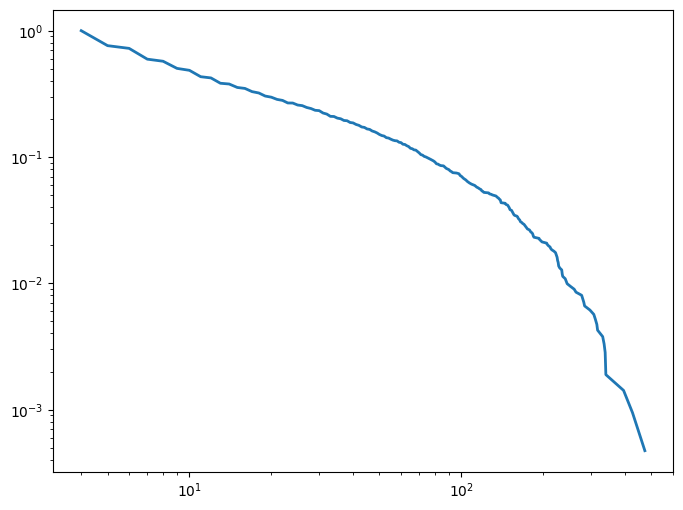

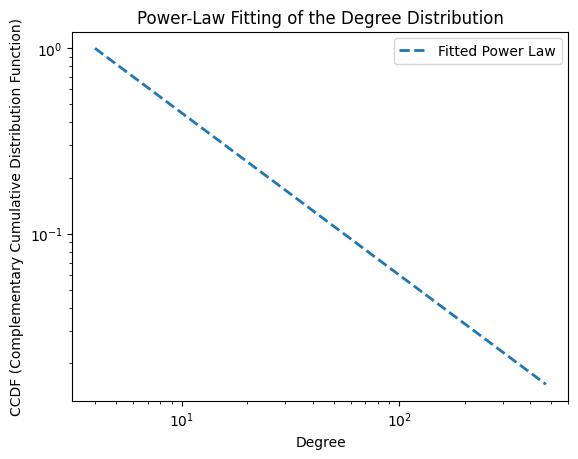

In [88]:
import powerlaw

print("Checking if the network follows a Power-Law distribution...")

# Get degree values
degrees = [d for _, d in G.degree()]

# Fit the Power-Law distribution
fit = powerlaw.Fit(degrees)

# Get the exponent (gamma)
gamma = fit.alpha
print(f"Power-Law Exponent (gamma): {gamma}")

# Compare to an ideal Power-Law
plt.figure(figsize=(8, 6))
fit.plot_ccdf(linewidth=2, label="Empirical Data")
fit.power_law.plot_ccdf(linewidth=2, linestyle="--", label="Fitted Power Law")
plt.xlabel("Degree")
plt.ylabel("CCDF (Complementary Cumulative Distribution Function)")
plt.title("Power-Law Fitting of the Degree Distribution")
plt.legend()
plt.show()


![scale_free_interpret](scale_free_interpret.png "interpret")

## Step 13: Community Detection
How airports form natural communities based on their connections

🔍 What is Community Detection?
* A community is a group of airports that are more connected internally than with the rest of the network.
* Why is it important?
    * Identifies regional hubs (e.g., European vs. North American airport clusters).
    * Finds airline alliances (e.g., Star Alliance, SkyTeam, Oneworld hubs).
    * Detects hidden structures in the flight network.

Detecting Communities Using the Louvain Method. The Louvain algorithm is widely used for finding communities in large networks.

* Finds communities using the Louvain method.
* Identifies the number of detected communities.

In [89]:
import community  # Install with: pip install python-louvain

print("Detecting communities using the Louvain method...")

# Convert to undirected for community detection
G_undirected = G.to_undirected()

# Compute Louvain Communities
partition = community.best_partition(G_undirected)

# Add communities to DataFrame
community_df = pd.DataFrame(list(partition.items()), columns=["Airport", "Community"])
community_df.to_csv("airport_communities.csv", index=False)

# Print number of communities
num_communities = len(set(partition.values()))
print(f"Number of detected communities: {num_communities}")


Detecting communities using the Louvain method...
Number of detected communities: 33


Visualizing Airport Communities. Plot the communities by coloring nodes based on their assigned community.

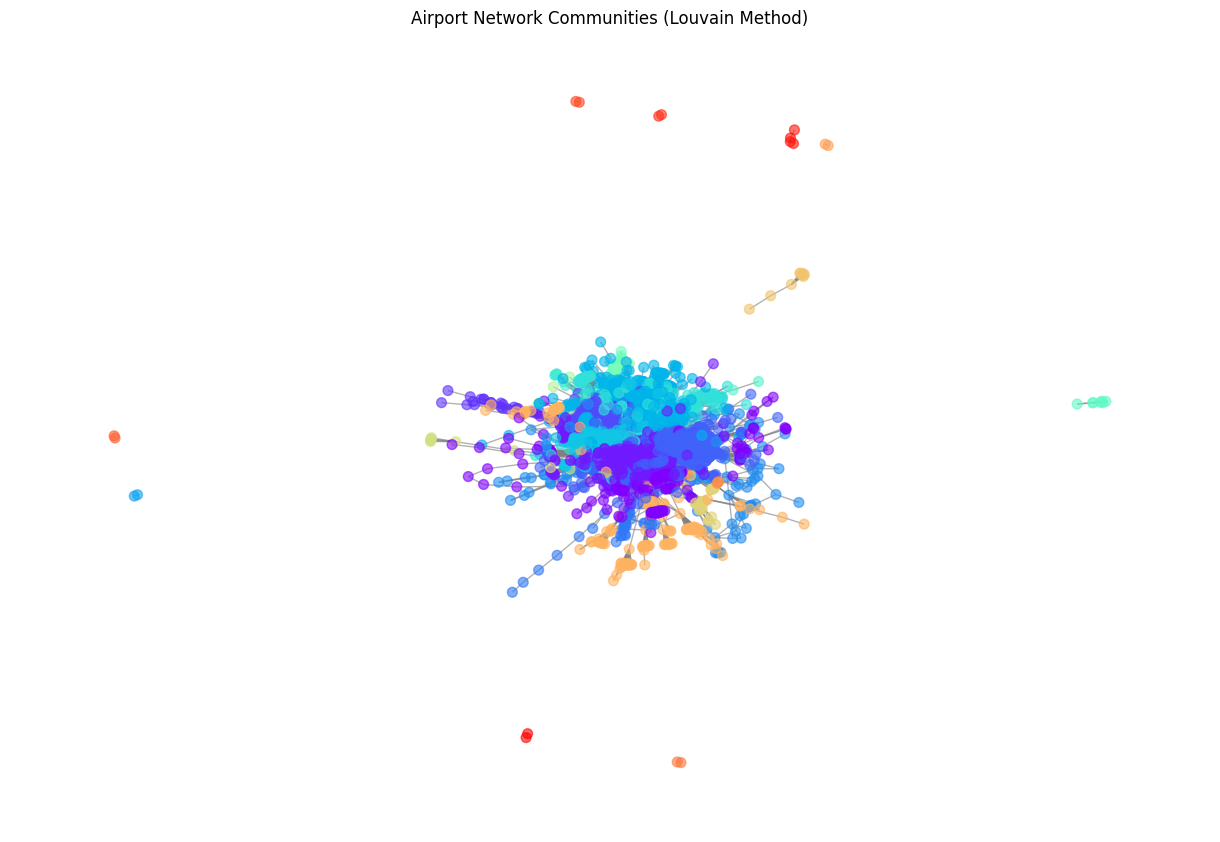

In [90]:
# Assign a color to each community
unique_communities = list(set(partition.values()))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_communities)))
color_map = {comm: colors[i] for i, comm in enumerate(unique_communities)}

# Plot network with community colors
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_undirected, seed=42)  # Set seed for consistent layout
nx.draw(G_undirected, pos, node_color=[color_map[partition[n]] for n in G_undirected.nodes()],
        with_labels=False, node_size=50, edge_color="gray", alpha=0.6)
plt.title("Airport Network Communities (Louvain Method)")
plt.show()


Community Size Distribution

* Shows how airports are distributed among communities.
* Highlights whether communities are evenly sized or dominated by a few large clusters.

C:\Users\Ali\AppData\Local\Temp\ipykernel_1724\2206305514.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=community_sizes.index, y=community_sizes.values, palette="viridis")


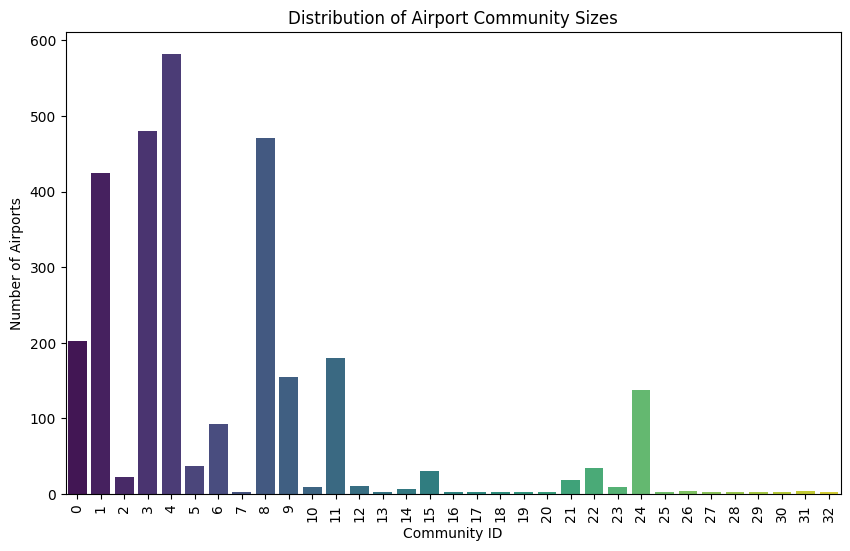

In [91]:
# Count airports per community
community_sizes = community_df["Community"].value_counts()

# Plot community size distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=community_sizes.index, y=community_sizes.values, palette="viridis")
plt.xlabel("Community ID")
plt.ylabel("Number of Airports")
plt.title("Distribution of Airport Community Sizes")
plt.xticks(rotation=90)
plt.show()


Interpretation

If there are few large communities

* The network is strongly modular, meaning certain regions are highly connected internally.

If there are many small communities

* The network is decentralized, with no dominant regional hubs.

If major hubs belong to different communities

* The network is well-balanced with multiple airline alliances or regional flight networks.